# Group Case Study 

## Telecom Churn Case Study(Machine learning - II)

#### Problem Statement:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
- Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.


- The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.
- Analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

- In churn prediction, we assume that there are three phases of customer lifecycle :

    - The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

    - The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

    - The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.


In this case study, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

#### Goals
1. To predict customers who will churn
2. Identifying important predictor attributes which help the business understand indicators of churn.

In [54]:
#Importing libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# importing SimpleImputer from sklearn
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#class imbalance SMOTE
from imblearn.over_sampling import SMOTE

## Step 1: Reading and Understanding the Data

In [55]:
train_df=pd.read_csv("train.csv")

In [56]:
# Checking the shape of the dataset
train_df.shape

(69999, 172)

The train data set has 69,999 rows and 172 column

In [57]:
train_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [58]:
# Checking the column wise info of the dataset
train_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

Lot of the columns are numeric type, but we need to inspect which are the categorical columns.

In [59]:
# Checking the numerical columns statistically
train_df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [60]:
#Create backup of data
backup_df=train_df.copy()

In [61]:
# create column name list by types of columns
id_cols = ['id', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             ]

num_cols = [column for column in train_df.columns if column not in id_cols + date_cols + cat_cols]

# printing the number of columns in each list
print("#ID columns: %d\n#Date columns:%d\n#Numeric columns:%d\n#Category columns:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# checking if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == train_df.shape[1])

#ID columns: 2
#Date columns:9
#Numeric columns:155
#Category columns:6
True


# Handling null values

In [62]:
# look at missing value ratio in each column
(train_df.isnull().sum()*100/train_df.shape[0]).round(2)

id                           0.00
circle_id                    0.00
loc_og_t2o_mou               1.00
std_og_t2o_mou               1.00
loc_ic_t2o_mou               1.00
last_date_of_month_6         0.00
last_date_of_month_7         0.57
last_date_of_month_8         1.05
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  3.95
onnet_mou_7                  3.84
onnet_mou_8                  5.29
offnet_mou_6                 3.95
offnet_mou_7                 3.84
offnet_mou_8                 5.29
roam_ic_mou_6                3.95
roam_ic_mou_7                3.84
roam_ic_mou_8                5.29
roam_og_mou_6                3.95
roam_og_mou_7                3.84
roam_og_mou_8                5.29
loc_og_t2t_mou_6             3.95
loc_og_t2t_mou_7             3.84
loc_og_t2t_mou_8             5.29
loc_og_t2m_mou_6             3.95
loc_og_t2m_mou_7             3.84
loc_og_t2m_mou_8             5.29
loc_og_t2f_mou

### Impute recharge columns

In [63]:
# some recharge columns have minimum value of 1 while some don't
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                 ]

train_df[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,126.500000,126.402071,125.374925,192.831096,201.455940,196.815792
std,2.794610,3.073472,3.101265,2.566377,2.799916,2.728246,1.279297,1.401230,1.457058,109.352573,109.459266,109.648799,190.623115,198.346141,192.280532
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,82.000000,92.000000,84.000000
50%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,42.000000,48.000000,44.000000,29.000000,34.000000,45.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


In [64]:
# It is also observed that the recharge date and the recharge value are null together 
# Which means the customer didn't recharge
train_df.loc[train_df.total_rech_data_6.isnull() & train_df.date_of_last_rech_data_6.isnull(), 
          ["total_rech_data_6", "date_of_last_rech_data_6"]].head()

,total_rech_data_6,date_of_last_rech_data_6
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN


Having null value in recharge columns means that the customer didn't do recharge in that month and hence can be replaced with 0

In [65]:
# create a list of recharge columns where we will impute null values with zeroes
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       ]

In [66]:
# impute null values with zero
train_df[recharge_cols] = train_df[recharge_cols].apply(lambda x: x.fillna(0))

In [67]:
# now, let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(train_df[recharge_cols].isnull().sum()*100/train_df.shape[1])

# summary statistics
print("\n\nSummary statistics\n")
print(train_df[recharge_cols].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       69999.000000       69999.000000       69999.000000   
mean            0.619309           0.683981           0.697867   
std             1.762010           1.943193           1.973434   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
count        69999.000000        69999.0000

In [68]:
# drop id and date columns
print("Shape before dropping: ", train_df.shape)
train_df = train_df.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", train_df.shape)

Shape before dropping:  (69999, 172)
Shape after dropping:  (69999, 161)


### Imputing null values in categorical variables

We will be replacing null values in the categorical values with '-1' where '-1' will be a new category.

In [69]:
# replace null values with '-1' in categorical columns
train_df[cat_cols] = train_df[cat_cols].apply(lambda x: x.fillna(-1))

In [70]:
#verifying imputation
train_df[cat_cols].isnull().sum()*100/train_df.shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64

### Droping variables with more than 70% of missing values

In [71]:
initial_cols = train_df.shape[1]

include_cols = list(train_df.apply(lambda column: True if column.isnull().sum()/train_df.shape[0] < 0.7 else False))

drop_missing = pd.DataFrame({'features':train_df.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]


,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,onnet_mou_6,True
7,onnet_mou_7,True
8,onnet_mou_8,True
9,offnet_mou_6,True


In [72]:
# droping columns
train_df = train_df.loc[:, include_cols]

dropped_cols = train_df.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))

-12 columns dropped.


### Imputing using Simple Imputer 
We will use mean startegy as the null vaues is in rage of max 5-6% of the total observations

In [73]:
%%time
from sklearn.impute import SimpleImputer
train_cols = train_df.columns
print('Total Columns :',len(train_cols))
# using simpleimputer mean technique to impute missing values in the rest of the columns
impute_cols=list(train_df.columns[train_df.isnull().any()])
imp_mean=SimpleImputer(strategy='mean')
train_df[impute_cols]=imp_mean.fit_transform(train_df[impute_cols])


Total Columns : 149
Wall time: 496 ms


In [74]:
#verifying imputation
train_df.isnull().sum()*100/train_df.shape[0]

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_m

In [75]:
train_df['churn_probability'].value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

From around 70000 customer records, we have about more than 7132 churned customers.

The churn rate would be as follows:

In [76]:
print('Churn Rate : {0}%'.format(round(((sum(train_df['churn_probability'])/len(train_df['churn_probability']))*100),2)))

Churn Rate : 10.19%


Churn rate is around 10% of the overall data available. This indicates that we would need to handle the class imbalance in this classification problem.

## EDA

In [77]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)

            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

In [78]:
train_df.head(5)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,1958,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,-1.0,0.0,-1.0,0,0,0,0,0,0,0,1,0,0,0,0,-1.0,1.0,-1.0,710,0.0,0.0,0.0,0
2,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0

In [79]:
train_df.info(verbose=1,null_counts='none')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 149 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    loc_og_t2o_mou      69999 non-null  float64
 1    std_og_t2o_mou      69999 non-null  float64
 2    loc_ic_t2o_mou      69999 non-null  float64
 3    arpu_6              69999 non-null  float64
 4    arpu_7              69999 non-null  float64
 5    arpu_8              69999 non-null  float64
 6    onnet_mou_6         69999 non-null  float64
 7    onnet_mou_7         69999 non-null  float64
 8    onnet_mou_8         69999 non-null  float64
 9    offnet_mou_6        69999 non-null  float64
 10   offnet_mou_7        69999 non-null  float64
 11   offnet_mou_8        69999 non-null  float64
 12   roam_ic_mou_6       69999 non-null  float64
 13   roam_ic_mou_7       69999 non-null  float64
 14   roam_ic_mou_8       69999 non-null  float64
 15   roam_og_mou_6       69999 non-null

### Univariate EDA

As our goal is to find churn in high value customer hence the variable important from that perspective are following
- arpu
- aon

we will group the months of the variables affecting arpu and aon 

In [80]:
arpu=['arpu_6','arpu_7','arpu_8']
total_rech_amt=['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']
night_pck_user=['night_pck_user_6','night_pck_user_7','night_pck_user_8']
fb_user=['fb_user_6','fb_user_7','fb_user_8']
vbc=['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g']

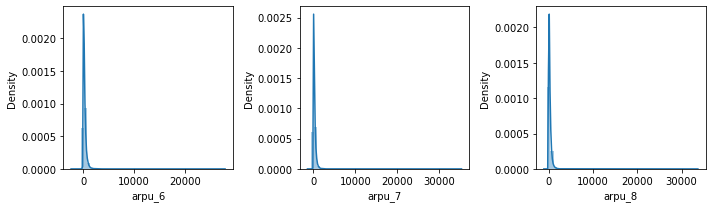

,arpu_6,arpu_7,arpu_8
count,69999.000000,69999.000000,69999.000000
mean,283.134365,278.185912,278.858826
std,334.213918,344.366927,351.924315
min,-2258.709000,-1289.715000,-945.808000
25%,93.581000,86.714000,84.095000
50%,197.484000,191.588000,192.234000
75%,370.791000,365.369500,369.909000
max,27731.088000,35145.834000,33543.624000


In [81]:
#analyzing arpu
plt.figure(figsize=[10,3])
for i, col in enumerate(arpu):
#    print(col)
    plt.subplot(1,3,i+1)
    univariate(train_df[col])
plt.tight_layout()
plt.show()
train_df[arpu].describe()

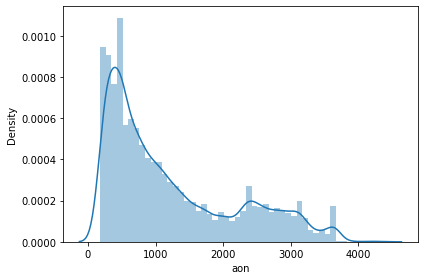

count    69999.000000
mean      1220.639709
std        952.426321
min        180.000000
25%        468.000000
50%        868.000000
75%       1813.000000
max       4337.000000
Name: aon, dtype: float64

In [82]:
#analyzing aon
univariate(train_df['aon'])
plt.tight_layout()
plt.show()
train_df['aon'].describe()

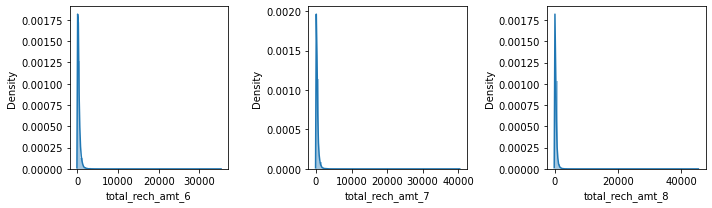

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
count,69999.000000,69999.000000,69999.000000
mean,328.139788,322.376363,323.846355
std,404.211068,411.070120,426.181405
min,0.000000,0.000000,0.000000
25%,110.000000,100.000000,90.000000
50%,229.000000,220.000000,225.000000
75%,438.000000,430.000000,436.000000
max,35190.000000,40335.000000,45320.000000


In [83]:
#analyzing total recharge amount
plt.figure(figsize=[10,3])
for i, col in enumerate(total_rech_amt):
#    print(col)
    plt.subplot(1,3,i+1)
    univariate(train_df[col])
plt.tight_layout()
plt.show()
train_df[total_rech_amt].describe()

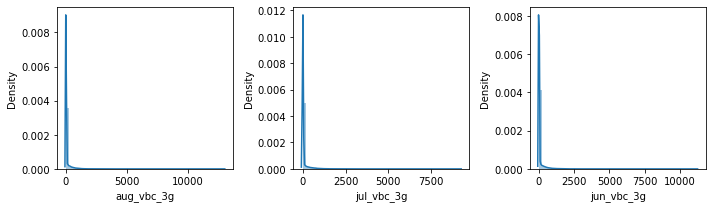

,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,69999.000000,69999.000000,69999.00000
mean,68.108597,65.935830,60.07674
std,269.328659,267.899034,257.22681
min,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.00000
max,12916.220000,9165.600000,11166.21000


In [84]:
#analyzing volume based cost user
plt.figure(figsize=[10,3])
for i, col in enumerate(vbc):
#    print(col)
    plt.subplot(1,3,i+1)
    univariate(train_df[col])
plt.tight_layout()
plt.show()
train_df[vbc].describe()

Variables are very **skewed** towards the left.

### Bivariate EDA

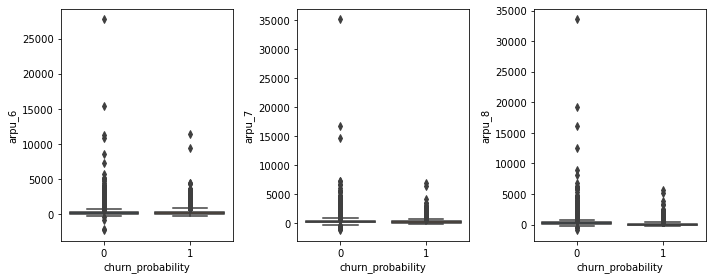

In [85]:
plt.figure(figsize=[10,4])
for i,col in enumerate(arpu):
    plt.subplot(1,3,i+1)
    sns.boxplot(train_df.churn_probability , train_df[col])
plt.tight_layout()
plt.show()

- As we can see the revenue produced by the churned customers in the 8th month is almost close to zero
- We can say that the customers who contribute to a high revenue in the month would be loyal towards the network and will not churn.

<AxesSubplot:xlabel='churn_probability', ylabel='aon'>

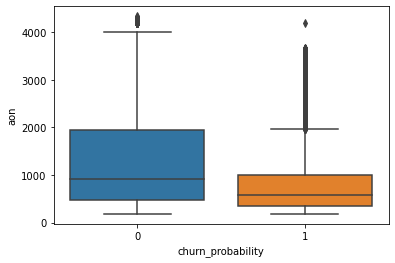

In [86]:
sns.boxplot(train_df.churn_probability , train_df.aon)

- Customers with less than 1000 days of age of network are more likely to churn and company should concentrate more on those customers by offering them new schems.
- Customers with more than 1000 days with network usage are more likely to stay loyal with the network.

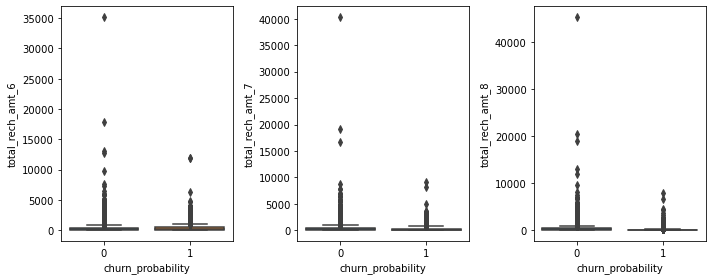

In [87]:
plt.figure(figsize=[10,4])
for i,col in enumerate(total_rech_amt):
    plt.subplot(1,3,i+1)
    sns.boxplot(train_df.churn_probability , train_df[col])
plt.tight_layout()
plt.show()

- As we can see the total recharge amount by the churned customers in the 8th month is almost close to zero
- We can say that the customers who contribute to a high revenue in the month would be loyal towards the network and will not churn.

### Correlation between numerical columns

In [88]:
# plt.figure(figsize=(50, 40))
# sns.heatmap(train_df.corr(), annot = True, annot_kws={'size': 10})
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.show()

- As multicolliniarity will be handled by PCA model, we won't be removing high collinearity columns for now.

### Outlier Check for numeric columns

In [89]:
# Checking kurtosis values
kurt_data = train_df.agg('kurtosis').transpose().sort_values(ascending=False)
kurt_data

isd_og_mou_6          26361.419827
isd_og_mou_8          25493.775744
isd_og_mou_7          24316.513704
og_others_8           20906.409873
og_others_7           18495.598211
og_others_6           17687.755255
ic_others_6            6562.225189
ic_others_7            4702.061307
loc_og_t2c_mou_7       3719.670386
spl_og_mou_7           3490.138627
ic_others_8            3224.482865
isd_ic_mou_6           3212.893834
spl_ic_mou_6           3166.315353
spl_ic_mou_8           2670.108194
std_ic_t2f_mou_8       1953.034282
total_rech_amt_8       1936.195190
std_ic_t2t_mou_7       1899.523864
arpu_7                 1644.999255
std_ic_t2f_mou_6       1641.931126
spl_ic_mou_7           1617.953842
isd_ic_mou_7           1450.107102
total_rech_amt_7       1406.268802
arpu_8                 1367.089281
std_ic_t2f_mou_7       1333.311454
roam_ic_mou_7          1325.036936
roam_ic_mou_8          1228.835781
std_ic_t2t_mou_8       1213.339466
roam_og_mou_8          1191.929686
spl_og_mou_6        

- The variables og_others_6,og_others_7,og_others_8,isd_og_mou_8,isd_og_mou_6,isd_og_mou_7 are showing very high kurtosis value and treating outliers based on these column will remove many of our rows
- Hence, let's remove these columns before outlier treatment

In [90]:
train_df.drop(['og_others_6','og_others_7','og_others_8','isd_og_mou_8','isd_og_mou_6','isd_og_mou_7'],inplace=True,axis=1)

In [91]:
# Checking kurtosis values
kurt_data = train_df.agg('kurtosis').transpose().sort_values(ascending=False)
kurt_data

ic_others_6           6562.225189
ic_others_7           4702.061307
loc_og_t2c_mou_7      3719.670386
spl_og_mou_7          3490.138627
ic_others_8           3224.482865
isd_ic_mou_6          3212.893834
spl_ic_mou_6          3166.315353
spl_ic_mou_8          2670.108194
std_ic_t2f_mou_8      1953.034282
total_rech_amt_8      1936.195190
std_ic_t2t_mou_7      1899.523864
arpu_7                1644.999255
std_ic_t2f_mou_6      1641.931126
spl_ic_mou_7          1617.953842
isd_ic_mou_7          1450.107102
total_rech_amt_7      1406.268802
arpu_8                1367.089281
std_ic_t2f_mou_7      1333.311454
roam_ic_mou_7         1325.036936
roam_ic_mou_8         1228.835781
std_ic_t2t_mou_8      1213.339466
roam_og_mou_8         1191.929686
spl_og_mou_6          1186.849365
std_ic_t2t_mou_6      1125.428646
std_og_t2f_mou_6      1029.672173
std_ic_t2m_mou_7       999.936142
loc_og_t2c_mou_6       987.126036
vol_3g_mb_6            916.618170
total_rech_amt_6       907.314615
std_og_t2f_mou

In [92]:
# Storing the variable having high kurtosis value for further treatment
outliers = list(kurt_data[kurt_data > 3].index)
outliers.remove('churn_probability')
print(outliers)
print('Total columns with >3 Kurtosis: ', len(outliers))

['ic_others_6', 'ic_others_7', 'loc_og_t2c_mou_7', 'spl_og_mou_7', 'ic_others_8', 'isd_ic_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_8', 'std_ic_t2f_mou_8', 'total_rech_amt_8', 'std_ic_t2t_mou_7', 'arpu_7', 'std_ic_t2f_mou_6', 'spl_ic_mou_7', 'isd_ic_mou_7', 'total_rech_amt_7', 'arpu_8', 'std_ic_t2f_mou_7', 'roam_ic_mou_7', 'roam_ic_mou_8', 'std_ic_t2t_mou_8', 'roam_og_mou_8', 'spl_og_mou_6', 'std_ic_t2t_mou_6', 'std_og_t2f_mou_6', 'std_ic_t2m_mou_7', 'loc_og_t2c_mou_6', 'vol_3g_mb_6', 'total_rech_amt_6', 'std_og_t2f_mou_7', 'loc_og_t2t_mou_8', 'isd_ic_mou_8', 'arpu_6', 'loc_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'spl_og_mou_8', 'std_ic_t2m_mou_6', 'sachet_3g_8', 'std_ic_mou_7', 'loc_ic_t2t_mou_7', 'loc_og_t2c_mou_8', 'sachet_3g_6', 'std_og_t2f_mou_8', 'sachet_3g_7', 'roam_ic_mou_6', 'vol_3g_mb_8', 'loc_og_t2f_mou_7', 'loc_og_t2t_mou_7', 'std_ic_mou_8', 'vol_3g_mb_7', 'std_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_8', 'loc_og_t2t_mou_6', 'roam_og_mou_7', 'loc_ic_t2f_mou_8', 

- Most rows will be removed as part of the outlier treatment if we go for 5 percentile removal from both ends.Hence, will just remove the 2 percentile.
- Since there are a lot of variables present in the dataset, PCA will be used to reduce the dimensions and handle the multicolliniarity while not losing a lot of information

In [93]:
#Outlier Treatment using IQR

for column in outliers:
    Q1 = train_df[column].quantile(.02)
    Q3 = train_df[column].quantile(.98)
    IQR = Q3 - Q1
    train_df = train_df[(train_df[column] >= Q1 - 1.5*IQR) & (train_df[column] <= Q3 + 1.5*IQR)]
    print('Treated column: ',column, 'Shape: ',train_df.shape)

Treated column:  ic_others_6 Shape:  (69429, 143)
Treated column:  ic_others_7 Shape:  (68959, 143)
Treated column:  loc_og_t2c_mou_7 Shape:  (68689, 143)
Treated column:  spl_og_mou_7 Shape:  (68488, 143)
Treated column:  ic_others_8 Shape:  (67996, 143)
Treated column:  isd_ic_mou_6 Shape:  (67485, 143)
Treated column:  spl_ic_mou_6 Shape:  (67481, 143)
Treated column:  spl_ic_mou_8 Shape:  (67477, 143)
Treated column:  std_ic_t2f_mou_8 Shape:  (67041, 143)
Treated column:  total_rech_amt_8 Shape:  (66990, 143)
Treated column:  std_ic_t2t_mou_7 Shape:  (66613, 143)
Treated column:  arpu_7 Shape:  (66587, 143)
Treated column:  std_ic_t2f_mou_6 Shape:  (66238, 143)
Treated column:  spl_ic_mou_7 Shape:  (66233, 143)
Treated column:  isd_ic_mou_7 Shape:  (65889, 143)
Treated column:  total_rech_amt_7 Shape:  (65873, 143)
Treated column:  arpu_8 Shape:  (65865, 143)
Treated column:  std_ic_t2f_mou_7 Shape:  (65558, 143)
Treated column:  roam_ic_mou_7 Shape:  (65067, 143)
Treated column:  

## Data Modelling

### Independent and target variable Split

In [94]:
y = train_df.pop('churn_probability')
X = train_df

### Feature Scaling

In [42]:
# Importing MinMaxScaler from sklearn library

from sklearn.preprocessing import MinMaxScaler

# Creating instance of class
scaler = MinMaxScaler()

In [43]:
# Apply scaler() to all the columns except the '1-0'
num_cols=list(X.columns)
print(len(num_cols))
for i in cat_cols:
    num_cols.remove(i)

X[num_cols] = scaler.fit_transform(X[num_cols])

X.head()

142


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,0.0,0.0,0.0,0.049931,0.133581,0.022816,0.024174,0.061550,0.000594,0.014991,0.044836,0.001021,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.003587,0.000000,0.000373,0.004692,0.014982,0.002125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004835,0.010879,0.001687,0.023883,0.062447,0.000503,0.009832,0.042300,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.022545,0.079554,0.000380,0.105155,0.006943,0.000000,0.025142,0.074550,0.001157,0.004204,0.006147,0.011917,0.000714,0.018572,0.014130,0.000000,0.000000,0.000000,0.002266,0.016801,0.016244,0.000000,0.038143,0.001262,0.025985,0.058889,0.049352,0.0,0.0,0.0,0.0,0.0,0.0,0.022233,0.078234,0.044172,0.007758,0.034659,0.025561,0.0,0.0,0.528,0.0,0.0,0.0,0.064874,0.040233,0.000000,0.047619,0.032258,0.031250,0.027228,0.020873,0.003643,0.086667,0.086667,0.012658,0.105008,0.105008,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.431658,0.0,0.0,0.0
1,0.0,0.0,0.0,0.037906,0.146505,0.037214,0.000000,0.000000,0.000000,0.000000,0.012053,0.013537,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.593581,0.873351,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.338660,0.359201,0.000000,0.010334,0.010090,0.002907,0.031889,0.016108,0.001214,0.016458,0.009267,0.001738,0.007774,0.015315,0.002391,0.026762,0.016454,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.002254,0.025772,0.015780,0.0,0.0,0.008,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.047619,0.064516,0.078125,0.000000,0.046564,0.018215,0.000000,0.193333,0.063291,0.000000,0.000000,0.000000,0.000000,0.066667

In [44]:
# 9 columns have all zero values so we can drop them
X.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,54301.0,54301.0,54301.0,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.0,54301.0,54301.0,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.0,54301.0,54301.0,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000,54301.000000
mean,0.0,0.0,0.0,0.125671,0.181543,0.110346,0.052063,0.051434,0.048611,0.075604,0.073602,0.070865,0.

In [45]:
zero_val_cols=['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou',
               'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8',
               'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']
X.drop(zero_val_cols, axis=1, inplace=True)

### Handling Class Imbalance using sampling Technique (SMOTE)

In [46]:
#lets print the stats before sampling
print("counts of label '1':",sum(y==1))
print("counts of label '0':",sum(y==0))

counts of label '1': 5698
counts of label '0': 48603


In [50]:
#perform oversampling using smote
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_smo,y_smo = smt.fit_resample(X,y)
y_smo.value_counts()

AttributeError: 'NoneType' object has no attribute 'split'